#### Import required libraries

In [153]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load data


In [154]:
df = pd.read_csv("FloodPrediction.csv")

display(df.head(10))

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN
5,5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
8,8,Barisal,1949,9,34.8,25.7,252.0,83.0,0.937037,4.8,4.823404,41950,536809.8,510151.9,22.7,90.36,4,1949.09,NaN
9,9,Barisal,1949,10,34.0,24.7,128.0,78.0,0.490741,3.1,7.000000,41950,536809.8,510151.9,22.7,90.36,4,1949.10,NaN


In [155]:
df['Flood?'] = df['Flood?'].fillna(0)
df.isnull().sum()

Sl                   0
Station_Names        0
Year                 0
Month                0
Max_Temp             0
Min_Temp             0
Rainfall             0
Relative_Humidity    0
Wind_Speed           0
Cloud_Coverage       0
Bright_Sunshine      0
Station_Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
Flood?               0
dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

#### Data Preprocessing

In [157]:
print(df['Flood?'].unique())


[0. 1.]


In [158]:
df = df.drop(['Sl', 'Station_Names', 'Year','Month'], axis=1)

display(df.head(10))
print(df.shape)

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,0.0
1,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,0.0
2,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,0.0
3,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,0.0
4,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,0.0
5,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
8,34.8,25.7,252.0,83.0,0.937037,4.8,4.823404,41950,536809.8,510151.9,22.7,90.36,4,1949.09,0.0
9,34.0,24.7,128.0,78.0,0.490741,3.1,7.000000,41950,536809.8,510151.9,22.7,90.36,4,1949.10,0.0


(20544, 15)


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Max_Temp           20544 non-null  float64
 1   Min_Temp           20544 non-null  float64
 2   Rainfall           20544 non-null  float64
 3   Relative_Humidity  20544 non-null  float64
 4   Wind_Speed         20544 non-null  float64
 5   Cloud_Coverage     20544 non-null  float64
 6   Bright_Sunshine    20544 non-null  float64
 7   Station_Number     20544 non-null  int64  
 8   X_COR              20544 non-null  float64
 9   Y_COR              20544 non-null  float64
 10  LATITUDE           20544 non-null  float64
 11  LONGITUDE          20544 non-null  float64
 12  ALT                20544 non-null  int64  
 13  Period             20544 non-null  float64
 14  Flood?             20544 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 2.4 MB


#### Target variable 

In [160]:
df['Flood?'].value_counts()

0.0    16412
1.0     4132
Name: Flood?, dtype: int64

#### Feature and target variable separation

In [161]:
X = df.drop('Flood?', axis=1)
y = df[['Flood?']]

print(X.shape, y.shape)

(20544, 14) (20544, 1)


#### Train test separation

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14380, 14) (6164, 14) (14380, 1) (6164, 1)


#### Stratification

In [163]:
class_0_train = y_train['Flood?'].value_counts().values[0]
class_1_train = y_train['Flood?'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.2517409470752089


In [164]:
class_0_test = y_test['Flood?'].value_counts().values[0]
class_1_test = y_test['Flood?'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.2518277822908205


#### Training: Logistic Regression

In [165]:
#model = LogisticRegression()
#model = DecisionTreeClassifier()
model = RandomForestClassifier()
model = model.fit(X_train, y_train)

#### Prediction

In [166]:
y_pred = model.predict(X_test)

#### Prediction Comparison with the test data

In [167]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Flood?'] = y_pred

display(y_test.sample(10))

,Flood?,probability,predicted_Flood?
3897,0.0,0.00,0.0
10732,0.0,0.00,0.0
3517,0.0,0.00,0.0
20423,0.0,0.00,0.0
15399,0.0,0.00,0.0
14500,0.0,0.03,0.0
279,0.0,0.02,0.0
6932,0.0,0.01,0.0
15365,0.0,0.14,0.0
9096,0.0,0.00,0.0


In [168]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?,probability,predicted_Flood?
15542,36.0,20.5,25.0,72.0,1.800000,3.0,8.100000,41966,725903.3,508021.9,22.67,92.20,63,1996.03,0.0,0.00,0.0
13256,36.0,25.4,788.0,89.0,1.114815,6.0,4.231429,41886,540975.3,737535.8,24.75,90.41,19,1953.09,1.0,0.99,1.0
4389,32.9,24.1,238.0,82.0,1.635185,3.2,7.533962,41992,705183.0,374324.6,21.46,91.98,4,1949.10,0.0,0.00,0.0
5521,31.7,14.4,61.0,63.0,0.600000,2.1,8.000000,41923,540098.6,629248.4,23.78,90.39,9,1983.02,0.0,0.00,0.0
1235,29.5,14.7,30.0,84.0,0.200000,1.9,5.600000,41951,567637.6,510271.8,22.70,90.66,5,2003.12,0.0,0.00,0.0
10494,33.9,25.7,475.0,86.0,1.596296,5.7,3.890000,41947,456632.4,521635.7,22.80,89.58,4,1951.07,1.0,0.95,1.0
5182,29.9,15.8,0.0,74.0,0.555556,1.2,7.822642,41923,540098.6,629248.4,23.78,90.39,9,1954.11,0.0,0.00,0.0
8954,40.2,17.0,20.0,58.0,1.200000,2.0,7.900000,41907,402483.2,667640.8,24.12,89.04,14,1995.03,0.0,0.00,0.0
8599,33.8,25.6,268.0,88.0,1.300000,6.6,4.944828,41907,402483.2,667640.8,24.12,89.04,14,1965.08,0.0,0.01,0.0
18572,34.4,23.8,116.0,87.0,0.500000,4.5,5.028571,41915,675761.6,687095.9,24.29,91.73,23,1971.09,0.0,0.02,0.0


#### Confusion Matrix

In [169]:
confusion_matrix_ = confusion_matrix(y_test['Flood?'], 
                                     y_test['predicted_Flood?'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[4851   73]
 [  90 1150]]


In [170]:
y_test['Flood?'].value_counts()

0.0    4924
1.0    1240
Name: Flood?, dtype: int64

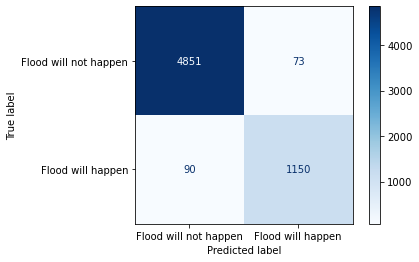

In [171]:
plot_confusion_matrix(model, X_test, y_test['Flood?'], display_labels=["Flood will not happen", "Flood will happen"],cmap='Blues')
plt.show()

In [172]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  4851
False Negatives =  90
False Positives =  73
True Positives =  1150


#### Accuracy

In [173]:
print("Calculated __________________________")
# calculate the accuracy of the model from the confusion matrix
accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy: ', accuracy)

print("\nScikit-Learn ________________________")
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test['Flood?'], 
                           y_test['predicted_Flood?'])

print('Accuracy: ', accuracy_)

Calculated __________________________
Accuracy:  0.9735561323815705

Scikit-Learn ________________________
Accuracy:  0.9735561323815705


In [174]:
print("Calculated __________________________")
precision = np.round(TP/(TP+FP), 2)
recall = np.round(TP/(TP+FN), 2)
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)

print("Precision = ", precision)
print("Recall = ", recall)
print("f1 score = ", f1_score_)

print("\nScikit-Learn ________________________")
precision_ = np.round(precision_score(y_test['Flood?'], 
                                      y_test['predicted_Flood?']), 2)
recall_ = np.round(recall_score(y_test['Flood?'], 
                                y_test['predicted_Flood?']), 2)
f1_score__ = np.round(f1_score(y_test['Flood?'], 
                               y_test['predicted_Flood?']), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1 score = ", f1_score__)

Calculated __________________________
Precision =  0.94
Recall =  0.93
f1 score =  0.93

Scikit-Learn ________________________
Precision =  0.94
Recall =  0.93
f1 score =  0.93


#### True Positive Rate, False Positive Rate

In [175]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.93
False Positive Rate =  0.01


#### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

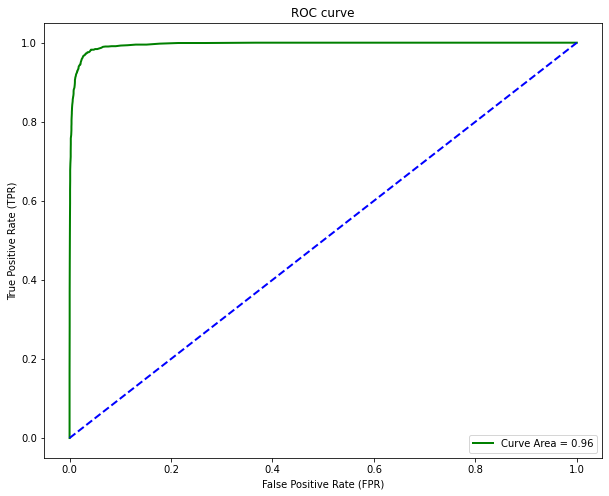

In [176]:
fpr, tpr, thr = roc_curve(y_test['Flood?'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Flood?'], 
                             y_test['predicted_Flood?']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Classification report

In [177]:
class_report = classification_report(y_test['Flood?'], 
                                     y_test['predicted_Flood?'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4924
         1.0       0.94      0.93      0.93      1240

    accuracy                           0.97      6164
   macro avg       0.96      0.96      0.96      6164
weighted avg       0.97      0.97      0.97      6164

